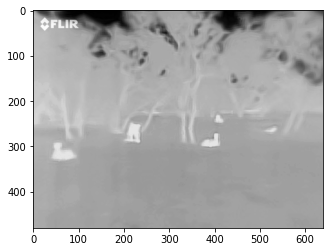

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/bluem/UTSA Research/unskewedtraindata"
CATEGORIES = ["Lying", "Running", "Standing"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to dir for category
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    
        
        

In [24]:
print(img_array.shape)

(480, 640)


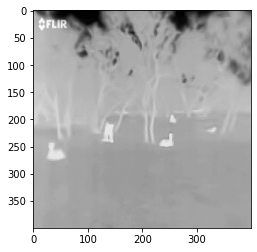

In [25]:
IMG_SIZE = 400


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # image resizing to 200x200
plt.imshow(new_array, cmap='gray')
plt.show()


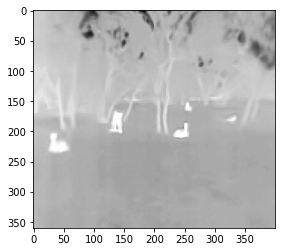

In [26]:
cropped_image = new_array[40:400, 0:400]
plt.imshow(cropped_image, cmap='gray')
plt.show()

In [27]:

# Create the training data set
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to dir for category
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # image resizing to 200x200
                new_array = new_array[40:400, 0:400] # image cropping to remove the FLIR logo
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()


In [28]:
print(len(training_data)) # correct length got list of all images




75


In [29]:
import random

#training is a mutable list
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

1
1
1
2
1
0
2
1
0
1


In [20]:
X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)

# unable to pass a list to the neural network
X = np.array(X).reshape(-1, IMG_SIZE-40, IMG_SIZE, 1)
Y = np.array(Y)

In [21]:

# save the training set
import pickle

pickle_out = open("UNX.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("UNY.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()



In [22]:
# how to load in the training data
pickle_in = open("UNX.pickle", "rb")
X = pickle.load(pickle_in)
X[1]

array([[[114],
        [114],
        [114],
        ...,
        [110],
        [110],
        [110]],

       [[113],
        [114],
        [114],
        ...,
        [111],
        [110],
        [110]],

       [[114],
        [114],
        [114],
        ...,
        [111],
        [110],
        [110]],

       ...,

       [[154],
        [154],
        [154],
        ...,
        [106],
        [106],
        [106]],

       [[154],
        [154],
        [154],
        ...,
        [106],
        [106],
        [106]],

       [[154],
        [154],
        [154],
        ...,
        [106],
        [106],
        [107]]], dtype=uint8)